In [122]:
import pandas as pd
import matplotlib.pyplot as plt


In [134]:
# Add styling
plt.style.use(['ggplot'])
px = 1/plt.rcParams['figure.dpi']  # pixel in inches

In [27]:
# Data
wta_matches_2015 = pd.read_csv('tennis_wta-master/wta_matches_2015.csv')
wta_players = pd.read_csv('tennis_wta-master/wta_players.csv')


In [88]:
# Group by winner name
most_wins = wta_matches_2015.groupby(['winner_name', 'tourney_level']).count()

# We can use the tourney ID as count for number of wins
most_wins['wins'] = most_wins['tourney_id']

# Drop all columns we are not interested in
most_wins = most_wins['wins']

# We unstack the tourney id's to get the wins of specific tournament
most_wins = most_wins.unstack('tourney_level').fillna(0)

# add a column with the total wins
most_wins['total'] = most_wins.sum(axis = 1)

# Sort on total wins
most_wins.sort_values(by = 'total', ascending = False, inplace = True)




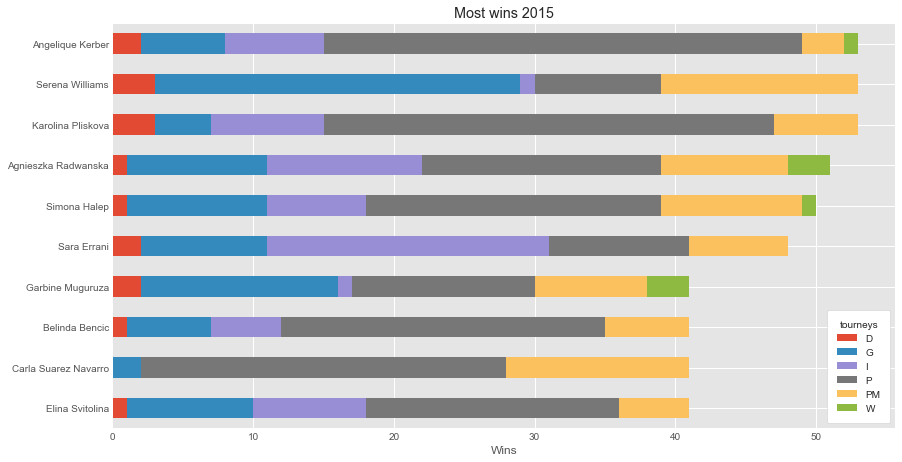

In [139]:
# get the top 10 winners
top10_most_wins = most_wins[:10].drop('total', axis=1)

# create figure
ax = top10_most_wins.plot(kind = 'barh', stacked = True, figsize = (900*px, 500*px))

# Set labels
ax.set_title('Most wins 2015')
ax.set_xlabel('Wins')
ax.set_ylabel('')
ax.invert_yaxis()
ax.legend(title = 'tourneys', frameon = True, framealpha = 1, facecolor = 'white', borderpad = 1)


plt.show()
